# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
data = pd.read_csv('monster_com_job_sample.csv')
data.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
3436,United States of America,US,NaN,No,jobs.monster.com,The Judge Group is looking for a AV Engineer. ...,AV Engineer Job in San Francisco,"Full Time, Employee","San Francisco, CA",Computer/IT Services,http://jobview.monster.com/AV-Engineer-Job-San...,NaN,IT/Software Development,90e724216c3899ee61dba599ad33e6fa
13082,United States of America,US,NaN,No,jobs.monster.com,The H-J Family of Companies is a growing and i...,Quality Manager Job in High Ridge,Full Time,"High Ridge, MO 63049","Electronics, Components, and Semiconductor Mfg",http://jobview.monster.com/Quality-Manager-Job...,NaN,NaN,130a5a477ab82ccb7f9f4b7bc6c0726a
11467,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Paladin Consulti...,Paladin Consulting,"Full Time, Temporary/Contract/Project",Paladin Consulting is currently hiring a ­­­­­...,Business Services - Other,http://jobview.monster.com/sr-accounting-manag...,NaN,NaN,a01bdf45d577ff979cce8ea08df31753
3561,United States of America,US,NaN,No,jobs.monster.com,Center for Vein Restoration is seeking a Nurse...,Licensed Practical Nurse Job in Grand Rapids,Full Time,"Grand Rapids, MI 49503",Healthcare Services,http://jobview.monster.com/Licensed-Practical-...,NaN,NaN,f07174220de2229ab2230cf67622ae4d
2780,United States of America,US,NaN,No,jobs.monster.com,CHRISTUS HomeCare of Shreveport is looking for...,FT Licensed MSW-Hospice &HH Job in Shreveport,"Full Time, Employee","Shreveport, LA 71101",Healthcare Services,http://jobview.monster.com/FT-Licensed-MSW-Hos...,NaN,Medical/Health,16c1f84514ba9d8c1fd08dede2832cc1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [ ]:
print(data['country'].unique(), data['country_code'].unique(), data['job_board'].unique())

['United States of America'] ['US'] ['jobs.monster.com']


In [ ]:
data['job_type'].unique()

array(['Full Time Employee', 'Full Time', 'Full Time, Employee',
       'Part Time Employee', nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` | object | в каждой строке содержатся одинаковые значения, что не является полезной информацией
```country_code``` | object | в каждой строке содержатся одинаковые значения, что не является полезной информацией, также столбик несет ту же информацию, что и country
```date_added``` | object | много NaN значений
```has_expired``` | object | стоит заменить на булевый тип данных
```job_board``` | object | в каждой строке содержатся одинаковые значения, что не является полезной информацией
```job_description``` | object | требуется очистка данных
```job_title``` | object | требуется очистка данных
```job_type``` | object | требуется стандартизация
```location``` | object | отсутствует единый формат (где-то есть индекс, где-то только город и штат)
```organization``` | object | много NaN значений
```page_url``` | object | если ссылки уникальны, то все корректно
```salary``` | object | значения в разных форматах, много NaN значений
```sector``` | object | много NaN значений
```uniq_id``` | object | если значения уникальны, то все корректно

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


In [ ]:
# таблица, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек
nan_val = pd.DataFrame({'Общее число ячеек' : len(data), 'Число пустых ячеек': data.isna().sum()})
nan_val

,Общее число ячеек,Число пустых ячеек
country,22000,0
country_code,22000,0
date_added,22000,21878
has_expired,22000,0
job_board,22000,0
job_description,22000,0
job_title,22000,0
job_type,22000,1628
location,22000,0
organization,22000,6867


In [ ]:
# количество строк датасета, в которых пустыми являются более 75% ячеек
threshold = 0.75 * len(data.columns)
nan_data = (data.isna().sum(axis = 1) > threshold).sum()
nan_data

np.int64(0)

<Axes: >

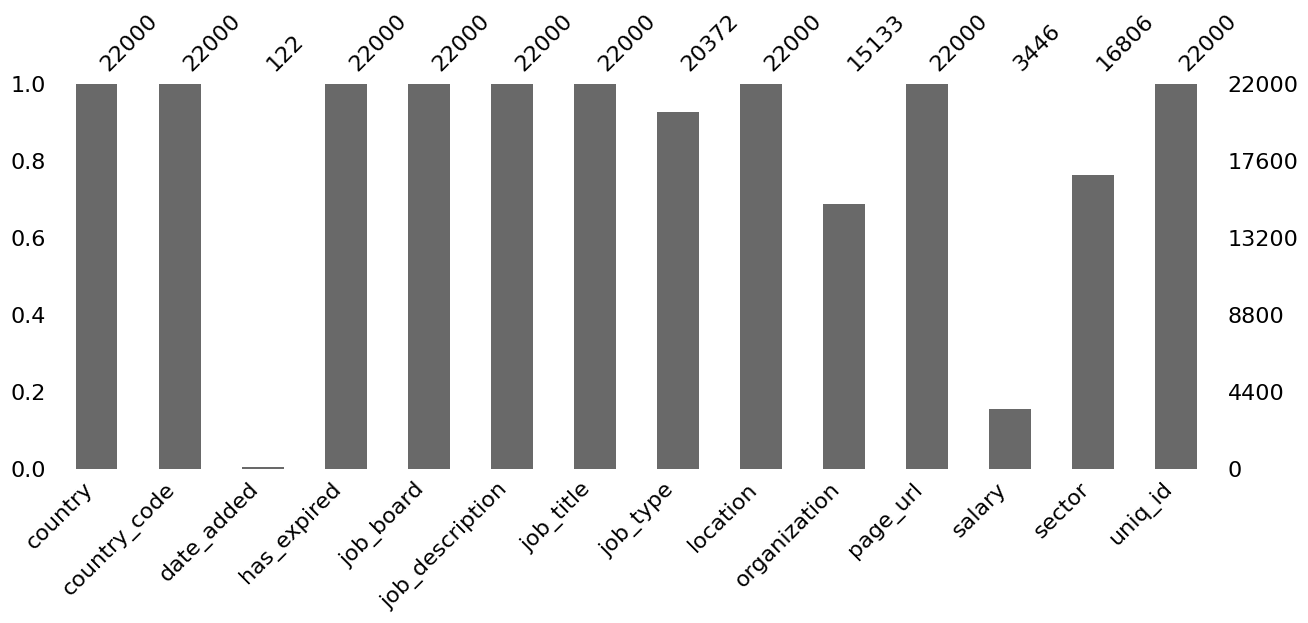

In [ ]:
# визуализация пропусков в датасете
msno.bar(data, figsize = (15, 5))

Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
# удалим все строки, где есть пустые значения
data_dropna = data.dropna(axis = 0)
data_dropna.shape


(5, 14)

Мы видим, что при удалении строк, где есть хотя бы одно пустое значение, в нашем датасете остается всего 5 строк, а значит мы не можем просто выкинуть все "неудобные" значения при работе с данными

### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [ ]:
# найдем столбцы, в которых встречается всего одно значение
unique = data.nunique()
single_value_columns = unique[unique == 1]
single_value_columns

,0
country,1
country_code,1
has_expired,1
job_board,1


В данном случае столбцы country, country_code и job_board бесполезны, и их можно удалить, так как очевидно, что все данные собраны на одном сайте и содержат информацию только об одной стране. Для анализа это не имеет никакого значения

Столбик has_expired следует оставить, даже если в нашем случае все его значения равны "No".  Он хранит в себе информацию об актуальности вакансии, а такие данные, в теории, могут менять и быть важными для понимания датасета

In [ ]:
# найдем количество значений, которые встречаются более чем в одном столбце
duplicates = {}
for col1 in data.columns:
  for col2 in data.columns:
    if col1 != col2:
      pair = tuple(sorted([col1, col2]))
      if pair not in duplicates:
        common_values = set(data[col1].dropna().unique()) & set(data[col2].dropna().unique())
        if common_values:
          duplicates[(col1, col2)] = len(common_values)
duplicates

{('job_description', 'job_title'): 1,
 ('job_description', 'location'): 849,
 ('job_title', 'location'): 12,
 ('job_type', 'location'): 1,
 ('job_type', 'organization'): 1,
 ('location', 'organization'): 126,
 ('organization', 'sector'): 2}

Теперь посмотрим, есть ли столбцы, название которых не соответствует содержанию. Сначала вычислим число уникальных значений в столбцах и будем проверять только те, где оно больше одного (потому что для одного значения корректность данных можно увидеть в отображенном выше примере строк датасета). Также учтем, что мы не можем проверить такие столбцы, как job_description, job_title, так как в описание и название профессии можно написать что угодно

In [ ]:
# посмотрим на уникальные значения стобцов, чтобы понять, соответствует ли их наполнение столбцам
data.nunique()

,0
country,1
country_code,1
date_added,78
has_expired,1
job_board,1
job_description,18744
job_title,18759
job_type,39
location,8423
organization,738


In [ ]:
data['date_added'].unique()
#значения соответствуют столбцу

array([nan, '5/10/2016', '5/13/2016', '5/9/2016', '6/10/2016', '1/2/2017',
       '6/17/2016', '6/24/2016', '6/23/2016', '12/20/2016', '12/12/2016',
       '7/15/2016', '7/8/2016', '10/31/2016', '10/28/2016', '4/28/2016',
       '4/27/2016', '4/29/2016', '9/12/2016', '1/16/2017', '9/22/2016',
       '3/25/2016', '6/20/2016', '11/17/2016', '7/11/2016', '12/7/2016',
       '12/14/2016', '12/29/2016', '5/5/2016', '5/6/2016', '05/09/2016',
       '8/11/2016', '3/17/2016', '4/4/2016', '4/7/2016', '4/6/2016',
       '9/21/2016', '5/18/2016', '3/15/2016', '5/19/2016', '6/8/2016',
       '6/7/2016', '10/18/2016', '12/2/2016', '11/7/2016', '3/29/2016',
       '4/8/2016', '5/26/2016', '9/15/2016', '8/17/2016', '11/21/2016',
       '12/15/2016', '10/27/2016', '10/25/2016', '6/27/2016', '7/5/2016',
       '7/4/2016', '7/7/2016', '8/25/2016', '9/5/2016', '8/23/2016',
       '9/2/2016', '9/1/2016', '8/31/2016', '9/26/2016', '8/5/2016',
       '8/2/2016', '3/28/2016', '3/22/2016', '2/29/2016', '9/9/2

In [ ]:
data['job_type'].unique()
#значения соответствуют столбцу

array(['Full Time Employee', 'Full Time', 'Full Time, Employee',
       'Part Time Employee', nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract

In [ ]:
data['location'].unique()
#значения не всегда соответствуют столбцу, в них есть тексты, больше похожие на описание

array(['Madison, WI 53702', 'Madison, WI 53708',
       "DePuy Synthes Companies is a member of Johnson & Johnson's Family of Companies, and is recruiting for a Senior Training Leader located in Raynham, MA.DePuy Synthes Companies of Johnson & Johnson is the largest, most innovative and comprehensive orthopedic and neurological business in the world. DePuy Synthes Companies offer an unparalleled breadth and depth of products, services and programs in the areas of joint reconstruction, trauma, spine, sports medicine, neurological, craniomaxillofacial, power tools and biomaterials. Building on the legacy and strengths of two great companies, more agile and better equipped to meet the needs of today’s evolving health care environment. With a focus on activating insights to develop innovative, comprehensive solutions, we are inspired to advance patient care in greater ways than either company could accomplish on its own.Position Overview• The Training Leader leads the site training functio

In [ ]:
data['organization'].unique()
#значения не всегда соответствуют столбцу, в них есть локации, а не названия организаций

array([nan, 'Printing and Publishing', 'Personal and Household Services',
       'Altec Industries', 'Retail', 'Computer/IT Services',
       'Computer Software',
       'Hotels and Lodging Personal and Household Services', 'Insurance',
       'Business Services - Other', 'Education',
       'Construction - Industrial Facilities and InfrastructureConstruction - Residential & Commercial/Office',
       'Accounting and Auditing Services', 'Legal Services',
       'Construction - Residential & Commercial/Office',
       'Engineering Services', 'AllComputer SoftwareComputer/IT Services',
       'Healthcare Services', 'Chicago, IL', 'Manufacturing - Other',
       'Oklahoma City, OK', 'Aerospace and Defense', 'San Francisco, CA',
       'Advertising and PR ServicesManagement Consulting ServicesBusiness Services - Other',
       'Other/Not Classified',
       'RetailAdvertising and PR ServicesBusiness Services - Other',
       'All', 'Electronics, Components, and Semiconductor Mfg',
       '

In [ ]:
data['salary'].unique()
#значения соответствуют столбцу

array([nan, '9.00 - 13.00 $ /hour', '80,000.00 - 95,000.00 $ /year', ...,
       '$80,000.00+ /year', '120,000.00 - 160,000.00 $ /yearbonus',
       '40,000.00 - 46,000.00 $ /year+ annual bonus (up to 15% of salary)'],
      dtype=object)

In [ ]:
data['sector'].unique()
#значения не всегда соответствуют столбцу, в них есть тексты, больше похожие на описание

array(['IT/Software Development', nan, 'Experienced (Non-Manager)',
       'Project/Program Management', 'Customer Support/Client Care',
       'Entry Level', 'Building Construction/Skilled Trades',
       'Civil & Structural EngineeringGeneral/Other: Engineering',
       'Installation/Maintenance/Repair', 'Business/Strategic Management',
       'Accounting/Finance/Insurance', 'General/Other: Engineering',
       'Engineering', 'Editorial/Writing', 'Medical/Health',
       'Marketing/Product', 'Manager (Manager/Supervisor of Staff)',
       'Administrative/Clerical', 'Student (Undergraduate/Graduate)',
       'Biotech/R&D/Science', 'Logistics/Transportation',
       'General/Other: Customer Support/Client Care',
       'Sales/Retail/Business Development', 'Education/Training', 'Other',
       'General/Other: Installation/Maintenance/RepairVehicle Repair and Maintenance',
       'General/Other: IT/Software Development',
       'Brand/Product MarketingGeneral/Other: Marketing/ProductProd

Можем сделать вывод о том, что не все столбцы содержат данные, которые им соответствуют

### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [ ]:
# проверим, все ли значения столбца uniq_id различны
if len(data) == data['uniq_id'].nunique():
  print('Все значения в столбце uniq_id уникальны')
else:
  print('Не все значения в столбце uniq_id уникальны')

Все значения в столбце uniq_id уникальны


In [ ]:
# проверим, есть ли в таблице другие столбцы, значения которых в каждой строке различны
un_cols = len(data) == data.nunique()
un_cols = un_cols[un_cols == True]
un_cols

,0
page_url,True
uniq_id,True


Видим, что в столбцах page_url и uniq_id значения уникальны

In [ ]:
# игнорируя столбцы, где все значения различны, попробуем найти такие строки, для которых значения по всем остальным столбцам будут совпадать
drop_uni_columns = data.drop(columns=['page_url', 'uniq_id'])


In [ ]:
duplicate_rows = drop_uni_columns[drop_uni_columns.duplicated(keep=False)]
duplicate_rows

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,salary,sector
17,United States of America,US,NaN,No,jobs.monster.com,We are currently seeking ambitious and persona...,Pest Control Technician – Field Service Rep (E...,"Full Time, Employee","Denver, CO",Accounting and Auditing Services,NaN,Installation/Maintenance/Repair
27,United States of America,US,NaN,No,jobs.monster.com,The Training Department plays a crucial role i...,Traveling Customer Training Professional Job i...,Full Time Employee,"Houston, TX 77040",AllComputer SoftwareComputer/IT Services,NaN,Customer Support/Client Care
47,United States of America,US,NaN,No,jobs.monster.com,The Project Manager reports directly to the Co...,Project Manager ( Z ) Job in Houston,Full Time Employee,"Houston, TX 77034",NaN,NaN,Business/Strategic Management
56,United States of America,US,NaN,No,jobs.monster.com,DescriptionIf your goal is to begin a fantasti...,CASHIER Job in Houston,Full Time,"Houston, TX",Retail,NaN,Experienced (Non-Manager)
95,United States of America,US,NaN,No,jobs.monster.com,The Judge Group is looking for a Scrum Master ...,Scrum Master Job in Denver,"Full Time, Employee","Denver, CO",Computer/IT Services,NaN,IT/Software Development
...,...,...,...,...,...,...,...,...,...,...,...,...
21942,United States of America,US,NaN,No,jobs.monster.com,Imagine Yourself in the Driver's Seat.Transpor...,Class A CDL Driver - TSC Job in Cincinnati,Full Time Employee,"Cincinnati, OH",Transport and Storage - Materials,NaN,Logistics/Transportation
21959,United States of America,US,NaN,No,jobs.monster.com,Senior Project Manager - Commercial Constructi...,Senior Project Manager - Commercial Constructi...,Full Time,"Cincinnati, OH 45206",Construction - Residential & Commercial/Office,NaN,Manager (Manager/Supervisor of Staff)
21963,United States of America,US,NaN,No,jobs.monster.com,Job Title:Consultant Security NetworkJob Descr...,Consultant Security Network Job in Cincinnati,Full Time Employee,Job Title:Consultant Security NetworkJob Descr...,All,NaN,IT/Software Development
21985,United States of America,US,NaN,No,jobs.monster.com,"We are a worldwide, leading manufacturer of ro...",General Manager of Sales & Marketing Job in Ci...,Full Time,"Cincinnati, OH",NaN,"negotiable salary / bonus, car, laptop, excell...","Executive (SVP, VP, Department Head, etc)"


In [ ]:
# удалим дубликаты
duplicate_rows.drop_duplicates()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,salary,sector
17,United States of America,US,NaN,No,jobs.monster.com,We are currently seeking ambitious and persona...,Pest Control Technician – Field Service Rep (E...,"Full Time, Employee","Denver, CO",Accounting and Auditing Services,NaN,Installation/Maintenance/Repair
27,United States of America,US,NaN,No,jobs.monster.com,The Training Department plays a crucial role i...,Traveling Customer Training Professional Job i...,Full Time Employee,"Houston, TX 77040",AllComputer SoftwareComputer/IT Services,NaN,Customer Support/Client Care
47,United States of America,US,NaN,No,jobs.monster.com,The Project Manager reports directly to the Co...,Project Manager ( Z ) Job in Houston,Full Time Employee,"Houston, TX 77034",NaN,NaN,Business/Strategic Management
56,United States of America,US,NaN,No,jobs.monster.com,DescriptionIf your goal is to begin a fantasti...,CASHIER Job in Houston,Full Time,"Houston, TX",Retail,NaN,Experienced (Non-Manager)
95,United States of America,US,NaN,No,jobs.monster.com,The Judge Group is looking for a Scrum Master ...,Scrum Master Job in Denver,"Full Time, Employee","Denver, CO",Computer/IT Services,NaN,IT/Software Development
...,...,...,...,...,...,...,...,...,...,...,...,...
21628,United States of America,US,NaN,No,jobs.monster.com,"About Us: Viox Services, a wholly owned subsid...",Project Development Specialist Job in Cincinnati,Full Time Employee,Location:,Manufacturing - Other,NaN,Project/Program Management
21729,United States of America,US,NaN,No,jobs.monster.com,One-Time Bonus You will receive a one-time bon...,Retail Sales Consultant Cincinnati OH (Cincinn...,NaN,"Cincinnati, OH",NaN,NaN,NaN
21755,United States of America,US,NaN,No,jobs.monster.com,1. Designs structured cabling systems for voic...,Infrastructure Engineer Job in Chicago,Full Time,"Chicago, IL 60603",Nonprofit Charitable Organizations,NaN,Entry Level
21764,United States of America,US,NaN,No,jobs.monster.com,"As America""s Un-carrier, T-Mobile US, Inc. (NY...",Retail Sales Associate Job in Cincinnati,NaN,"Cincinnati, OH 45255",NaN,NaN,NaN


Оказывается, что если мы уберем столбцы с уникальными значениям (уникальный идентификатор записи о вакансии и ссылка на нее), то из всех 22000 строк найдется 2078 строк, среди которых только 910 будут уникальными, остальные же будут дублировать содержание этих 910 строк. Получается, что некоторые вакансии просто размещались на сайте несколько раз

# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

In [ ]:
# посмотрим, какие встречаются форматы
data['location'].unique()

array(['Madison, WI 53702', 'Madison, WI 53708',
       "DePuy Synthes Companies is a member of Johnson & Johnson's Family of Companies, and is recruiting for a Senior Training Leader located in Raynham, MA.DePuy Synthes Companies of Johnson & Johnson is the largest, most innovative and comprehensive orthopedic and neurological business in the world. DePuy Synthes Companies offer an unparalleled breadth and depth of products, services and programs in the areas of joint reconstruction, trauma, spine, sports medicine, neurological, craniomaxillofacial, power tools and biomaterials. Building on the legacy and strengths of two great companies, more agile and better equipped to meet the needs of today’s evolving health care environment. With a focus on activating insights to develop innovative, comprehensive solutions, we are inspired to advance patient care in greater ways than either company could accomplish on its own.Position Overview• The Training Leader leads the site training functio

In [ ]:
data_loc = data

In [ ]:
# посмотрим, какие есть форматы, исключив тексты, попавшие в столбец случайно
data_loc = data_loc[data_loc['location'].apply(len) < 100]
data_loc['location'].unique()

array(['Madison, WI 53702', 'Madison, WI 53708', 'Dixon, CA', ...,
       'Mason, OH 45242', 'Cold Spring, KY 41076', 'Bellevue, KY'],
      dtype=object)

In [ ]:
# напишем регулярные выражения для разных форматов

patterns = {
    "City, State, Zip": r"^[A-Za-z\s]+,\s[A-Za-z]{2}\s\d{5}$",
    "City, State": r"^[A-Za-z\s]+,\s[A-Za-z]{2}$",
    "City, Zip": r"^[A-Za-z\s]+\s\d{5}$",
    "State, Zip": r"^[A-Z]{2}\s\d{5}$",
    "City": r"^[A-Za-z\s]+$",
    "State": r"^[A-Za-z]{2}$",
    "Zip": r"^\d{5}$"
}

def classify_location(location):
    for category, pattern in patterns.items():
        if re.match(pattern, str(location).strip()):
            return category
    return "Unknown Format"

data["format"] = data["location"].apply(classify_location)

# Подсчет количества каждого формата
format_counts = data["format"].value_counts()



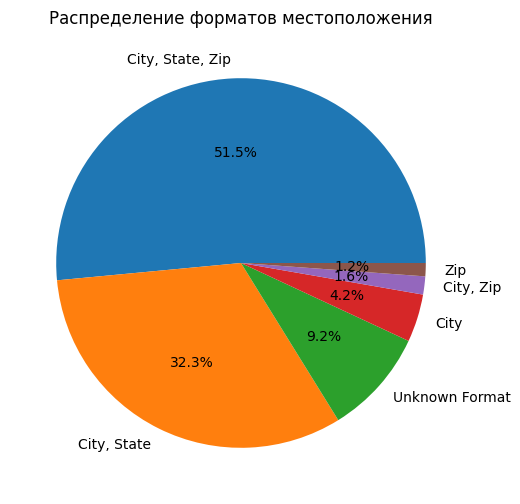

In [ ]:
# визуализируем количество найденных форматов на круговой диаграмме
plt.figure(figsize=(10, 6))
plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%')
plt.title("Распределение форматов местоположения")
plt.show()

Видим, что чаще всего используется формат "Город, штат индекс" и "Город, штат"

#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [ ]:
# выделяем в отдельный датасет данные, где не удалось определить формат
unknown_format_data = data[data["format"] == "Unknown Format"]


In [ ]:
# выделяем в отдельный датасет данные, где удалось определить формат
data_loc_cleaned = data[data["format"] != "Unknown Format"].copy()


In [ ]:
# Разбиваем location на три столбца (город, штат, индекс) и преобразуем индекс в числовой формат, если значение не NaN
data_loc_cleaned[['city', 'state', 'zip']] = data_loc_cleaned['location'].str.extract(
    r'(?P<city>[A-Za-z\s]+)?,?\s?(?P<state>[A-Z]{2})?\s?(?P<zip>\d{5})?'
)

data_loc_cleaned['zip'] = data_loc_cleaned['zip'].apply(lambda x: int(x) if pd.notna(x) else None).astype('Int64')

data_loc_cleaned.sample(5, random_state=42)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,format,city,state,zip
2488,United States of America,US,NaN,No,jobs.monster.com,Third Coast is a consistently growing company...,Entry Level Marketing and Advertising Position...,Full Time Employee,"Houston, TX 77040",RetailAdvertising and PR ServicesBusiness Serv...,http://jobview.monster.com/entry-level-marketi...,NaN,Marketing/Product,0f84620742fbc634f3cddcbd0c82d93e,"City, State, Zip",Houston,TX,77040
13781,United States of America,US,NaN,No,jobs.monster.com,Job SummaryCome join our energetic and quality...,MATLAB Coder Software Engineer in Test Job in ...,Full Time,"Natick, MA",Education,http://jobview.monster.com/MATLAB-Coder-Softwa...,NaN,Experienced (Non-Manager),d4d7a34c5ea88d3c5b7f62a8f4883452,"City, State",Natick,MA,<NA>
17985,United States of America,US,NaN,No,jobs.monster.com,Accountant: Commercial Real Estate/Property Ma...,Staff Accountant Job in Dallas,Full Time,"Dallas, TX 75207",Real Estate/Property Management,http://jobview.monster.com/Staff-Accountant-Jo...,"38,000.00 - 42,000.00 $ /year",Experienced (Non-Manager),61c41696a1788afe8d85c4e62f69f9d5,"City, State, Zip",Dallas,TX,75207
11828,United States of America,US,NaN,No,jobs.monster.com,Eliot Center for Health & Rehabilitation is a ...,Registered Nurse FT pm-p or p-am Job in Natick,Full Time,"Natick, MA 01760",Nonprofit Charitable Organizations,http://jobview.monster.com/registered-nurse-ft...,NaN,Experienced (Non-Manager),cd7e4767f1ac44fecb0817b667ded756,"City, State, Zip",Natick,MA,1760
10006,United States of America,US,NaN,No,jobs.monster.com,If you're looking for the benefits of joining ...,Utility Job in Pembroke Pines,Full Time / Employee,"Pembroke Pines, FL",NaN,http://jobview.monster.com/Utility-Job-Pembrok...,NaN,Manufacturing/Production/Operations,9b182654d5cafeca074a8e620484ed63,"City, State",Pembroke Pines,FL,<NA>


Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
# попробуем извлечь из данных все, что возможно
def extract_location_parts(location):
    zip_code = re.search(r'\b\d{5}\b', location)
    state = re.search(r'\b[A-Z]{2}\b', location)
    city = re.sub(r'\b\d{5}\b|\b[A-Z]{2}\b', '', location).strip(", ")

    # Если длина города больше 10 символов, оставляем его пустым
    city = city if len(city) <= 10 else np.nan

    return city, state.group() if state else np.nan, int(zip_code.group()) if zip_code else np.nan


unknown_format_data[['city', 'state', 'zip']] = unknown_format_data['location'].apply(lambda x: pd.Series(extract_location_parts(str(x))))
unknown_format_data['zip'] = unknown_format_data['zip'].apply(lambda x: int(x) if pd.notna(x) else np.nan).astype('Int64')

unknown_format_data.sample(5)


<ipython-input-199-ec1353a1f665>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_format_data[['city', 'state', 'zip']] = unknown_format_data['location'].apply(lambda x: pd.Series(extract_location_parts(str(x))))
<ipython-input-199-ec1353a1f665>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_format_data[['city', 'state', 'zip']] = unknown_format_data['location'].apply(lambda x: pd.Series(extract_location_parts(str(x))))
<ipython-input-199-ec1353a1f665>:13: SettingWithCopyWarning: 
A valu

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,format,city,state,zip
9557,United States of America,US,NaN,No,jobs.monster.com,"About Us: Viox Services, a wholly owned subsid...",HVAC Technician Job in Nashville,Full Time Employee,Location:,Manufacturing - OtherReal Estate/Property Mana...,http://jobview.monster.com/HVAC-Technician-Job...,NaN,Installation/Maintenance/Repair,9a85ce97dcf93fbf5a1b5f68b2c1f8a5,Unknown Format,Location:,NaN,<NA>
8326,United States of America,US,NaN,No,jobs.monster.com,Position Number: 7067-628-04271 Open Date: 4/2...,Physical Therapist (Per Diem $. per hour) Job ...,"Full Time, Employee",Position Number: 7067-628-04271 Open Date: 4/2...,Healthcare Services,http://jobview.monster.com/Physical-Therapist-...,NaN,Medical/Health,ec637297b25302faab1e144921e74a5f,Unknown Format,NaN,FL,4271
8074,United States of America,US,NaN,No,jobs.monster.com,Position Number: 5155-111-042516 Open Date: 4/...,Chief Medical Officer & Vice President Job in ...,"Full Time, Employee",Position Number: 5155-111-042516 Open Date: 4/...,Healthcare Services,http://jobview.monster.com/Chief-Medical-Offic...,NaN,Medical/Health,f91c3361e69dd5d1dc2dedce630ad13b,Unknown Format,NaN,FL,<NA>
304,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job VanderHouwen has...,VanderHouwen & Associates Job Application for ...,"Full Time, Temporary/Contract/Project",Contact name Recruiter Phone 503.299.6811 Addr...,All,http://jobview.monster.com/qa-analyst-job-port...,NaN,NaN,197e4f84ffac531685c26f7a0081d3a9,Unknown Format,NaN,SW,97239
21540,United States of America,US,NaN,No,jobs.monster.com,"About Us: EMCOR Facilities Services (EFS), an ...",Custodial Lead Job in Cincinnati,Full Time Employee,Location:,Real Estate/Property ManagementHealthcare Serv...,http://jobview.monster.com/Custodial-Lead-Job-...,NaN,Installation/Maintenance/Repair,7bebb563b4e1361c9fede6bbc1ce88e3,Unknown Format,Location:,NaN,<NA>


In [ ]:
# объединим unknown_format_data и data_loc_cleaned
data_combined = pd.concat([data_loc_cleaned, unknown_format_data], axis=0)


In [ ]:
# добавим в data столбцы city, zip, state и даннные, которые они содержат
data = data.merge(data_combined[['uniq_id', 'city', 'state', 'zip']], on='uniq_id', how='left')

In [ ]:
data

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,format,city,state,zip
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"City, State, Zip",Madison,WI,53702
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"City, State, Zip",Madison,WI,53708
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,Unknown Format,NaN,MA,<NA>
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"City, State",Dixon,CA,<NA>
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"City, State",Camphill,PA,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,"City, State",Cincinnati,OH,<NA>
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,"City, State, Zip",Cincinnati,OH,45236
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345,"City, State, Zip",Chicago,IL,60602
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,"City, State, Zip",Chicago,IL,60609


In [ ]:
# уберем столбцы location и format, тк важные данные из них уже были извлечены
data.drop(columns=['location','format'], inplace=True)
data.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,organization,page_url,salary,sector,uniq_id,city,state,zip
7340,United States of America,US,NaN,No,jobs.monster.com,Aflac Insurance Sales Agent While a career in ...,Benefits Counselor Job in Atlanta,Full Time,Insurance,http://jobview.monster.com/benefits-counselor-...,NaN,Customer Support/Client Care,94bbb36fafb5824139c9aef517d00922,Atlanta,GA,30312
4058,United States of America,US,NaN,No,jobs.monster.com,"Operations Lead – CWO SolutionsFoster City, CA...",Operations Lead - Foster City,Full Time,Staffing/Employment Agencies,http://jobview.monster.com/operations-lead-fos...,NaN,NaN,7528f659e833f45d39384d10ba30c3d1,Foster City,CA,94102
9597,United States of America,US,NaN,No,jobs.monster.com,Position Summary:Is responsible for the hands ...,Process Tech - HDPE - D Shift Job in Medina,Full Time,NaN,http://jobview.monster.com/Process-Tech-HDPE-D...,NaN,Manufacturing/Production/Operations,04c6aa99abc71583e01474600c6a2bb7,Medina,OH,44256
15226,United States of America,US,NaN,No,jobs.monster.com,Summary RETAIL SUPERVISOR FULL TIME Our reta...,Retail Supervisor Full Time Job in Houston,Full Time Employee,Retail,http://jobview.monster.com/retail-supervisor-f...,NaN,Manufacturing/Production/Operations,daf0bf01909e6da790333a1049ac4281,Houston,TX,<NA>
19984,United States of America,US,NaN,No,jobs.monster.com,Description/Job SummaryCommunicate to manageme...,Food Service Worker II Job in Beaufort/ Hilton...,Part Time,Food and Beverage Production,http://jobview.monster.com/Food-Service-Worker...,NaN,Entry Level,2cff76489ea26408bf189ea4af56bb80,NaN,SC,29902


### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Регулярные выражения для поиска форматов зарплаты
patterns = {
    'From-To (Hour)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*-\s*\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*/\s*hour",
    'From-To (Year)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*-\s*\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*/\s*year",
    'From-To (Week)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*-\s*\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*/\s*week",
    'Fixed (Hour)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*/\s*hour",
    'Fixed (Year)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*/\s*year",
    'Fixed (Week)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*/\s*week",
    'Fixed with +': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\+\s*/\s*(?:hour|year)",
    'Up to': r"Up to\s+\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?",
    'From-To (No Period)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\s*-\s*\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?",
    'Fixed (No Period)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?",
    'Fixed with + (No Period)': r"\$?\d{1,3}(?:,\d{3})?(?:\.\d{2})?\+",
    'Negotiable/Discussed': r"\b(negotiated|discussed|DOE|negotiable)\b",
    'Bonus': r"\b(bonus|benefits|benifits|commission|Commissions)\b",
    'Depends on experience': r"\b(experience)\b"
}

def classify_salary(salary):
    if pd.isna(salary):
        return 'NaN'
    for category, pattern in patterns.items():
        if re.search(pattern, str(salary), re.IGNORECASE):
            return category
    return 'Unknown Format'


data['salary_format'] = data['salary'].apply(classify_salary)


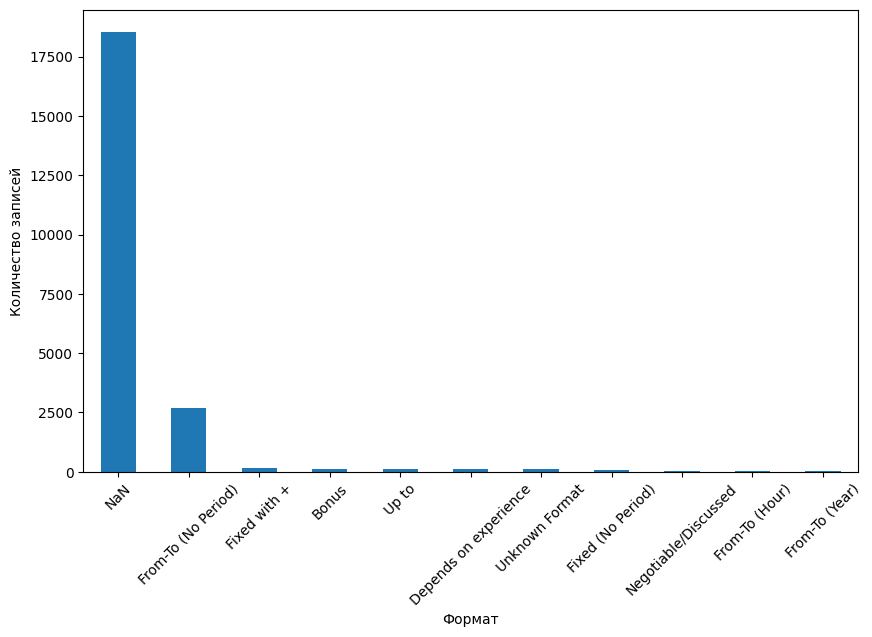

In [ ]:
salary_counts = data['salary_format'].value_counts()
plt.figure(figsize=(10, 6))
salary_counts.plot(kind='bar')
plt.xlabel("Формат")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.show()


Оказывается, что очень многие работодатели не указали зарплату

#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

In [ ]:
def extract_salary_components(salary):
    if pd.isna(salary):
        return np.nan, np.nan, np.nan

    salary = salary.replace(',', '')
    salary = salary.replace('$', '')
    min_salary, max_salary, period = np.nan, np.nan, np.nan

    # поиск диапазона зарплат
    match_range = re.search(r"(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)\s*/\s*(hour|year)", salary, re.IGNORECASE)
    if match_range:
        min_salary, max_salary, period = float(match_range.group(1)), float(match_range.group(2)), match_range.group(3)
        return min_salary, max_salary, period

    # поиск фиксированной зарплаты с периодом
    match_fixed = re.search(r"\$?(\d+(?:\.\d+)?)\s*/\s*(hour|year)", salary, re.IGNORECASE)
    if match_fixed:
        min_salary, period = float(match_fixed.group(1)), match_fixed.group(2)
        return min_salary, np.nan, period

    # поиск "Up to"
    match_up_to = re.search(r"Up to\s+\$?(\d+(?:\.\d+)?)\s*/\s*(hour|year)", salary, re.IGNORECASE)
    if match_up_to:
        max_salary, period = float(match_up_to.group(1)), match_up_to.group(2)
        return np.nan, max_salary, period

    # поиск фиксированного значения без периода
    match_single = re.search(r"\$?(\d+(?:\.\d+)?)", salary)
    if match_single:
        min_salary = float(match_single.group(1))
        return min_salary, np.nan, np.nan

    return np.nan, np.nan, np.nan


data[['salary_min', 'salary_max', 'salary_period']] = data['salary'].apply(lambda x: pd.Series(extract_salary_components(str(x))))


data['salary_min'] = pd.to_numeric(data['salary_min'], errors='coerce')
data['salary_max'] = pd.to_numeric(data['salary_max'], errors='coerce')


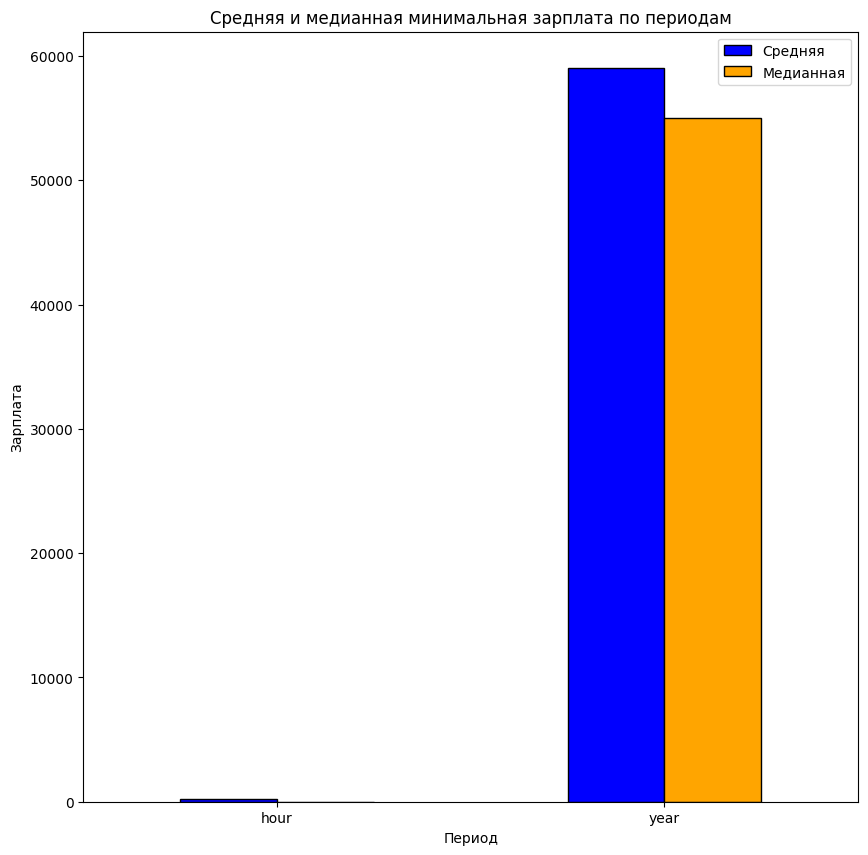

In [ ]:
salary_stats = data.groupby('salary_period')['salary_min'].agg(['mean', 'median'])

# строим столбчатую диаграмму
pl = salary_stats.plot(kind='bar', figsize=(10, 10), color=['blue', 'orange'], edgecolor='black')
plt.title("Средняя и медианная минимальная зарплата по периодам")
plt.xlabel("Период")
plt.ylabel("Зарплата")
plt.xticks(rotation=0)
plt.legend(["Средняя", "Медианная"])
plt.show()

In [ ]:
salary_stats

,mean,median
salary_period,,
hour,200.477084,16.0
year,59005.806286,55000.0


#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

In [ ]:
salary_periods = data[['salary_min', 'salary_period']].dropna()
salary_range = salary_periods.groupby('salary_period').agg(['min', 'max'])
salary_range

salary_min          
                     min       max
salary_period                     
hour                 0.0  100000.0
year                 0.0  850000.0

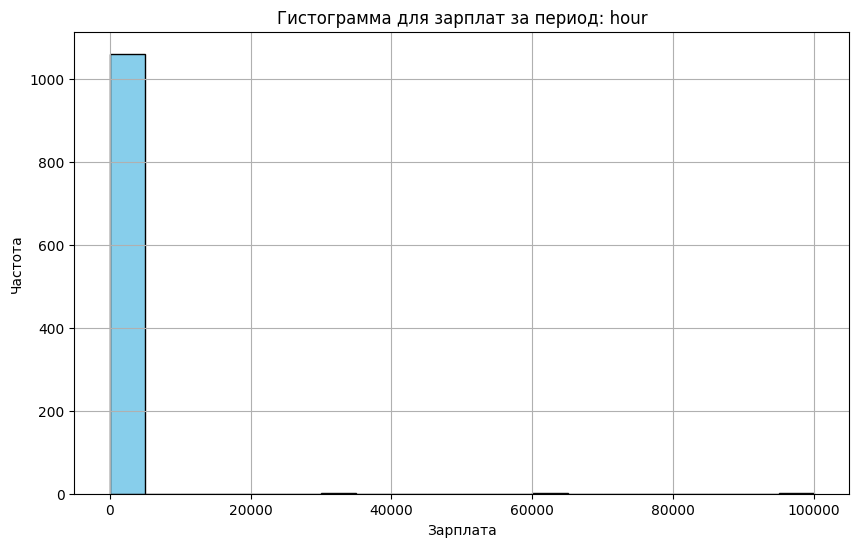

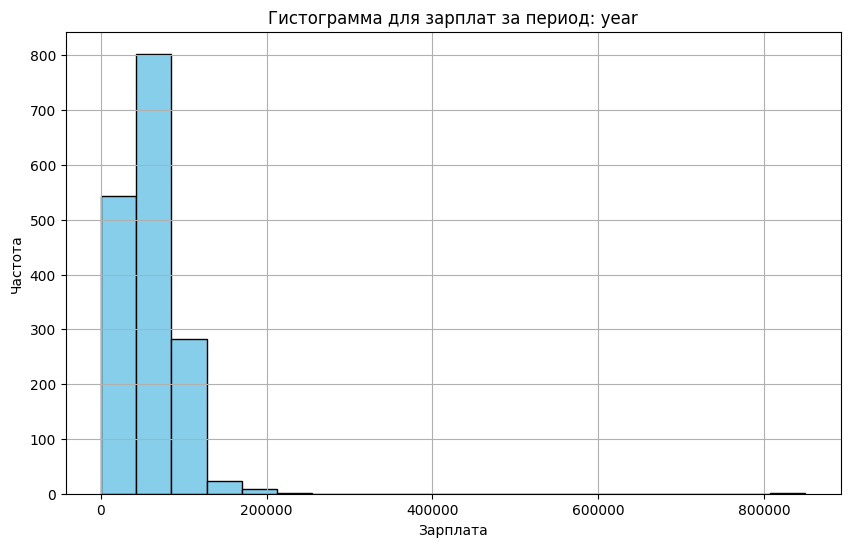

In [ ]:
for period in salary_range.index:
    plt.figure(figsize=(10, 6))
    period_data = salary_periods[salary_periods['salary_period'] == period]
    plt.hist(period_data['salary_min'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Гистограмма для зарплат за период: {period}")
    plt.xlabel("Зарплата")
    plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

In [ ]:
def period(row):
    if pd.isna(row['salary_period']):
        min_salary = row['salary_min']

        diff_hour = abs(min_salary - salary_stats['mean']['hour'])
        diff_year = abs(min_salary - salary_stats['mean']['year'])

        if diff_hour < diff_year:
            return 'hour'
        elif diff_year < diff_hour:
            return 'year'
        else:
            return np.nan  # Если разница одинакова, не присваиваем период
    return row['salary_period']


data['salary_period'] = data.apply(lambda row: period(row), axis=1)
d=data[data['salary_format'] == 'Up to']
d.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,organization,page_url,salary,sector,uniq_id,city,state,zip,salary_format,salary_min,salary_max,salary_period
14069,United States of America,US,NaN,No,jobs.monster.com,Job Description:Our food processing facility i...,Production Lead Job in Oxnard,NaN,Other/Not Classified,http://jobview.monster.com/Production-Lead-Job...,Up to $15.00,Experienced (Non-Manager),9a94c7b2792573a7e8643e7e5f113060,Oxnard,CA,93030,Up to,15.0,NaN,hour
5516,United States of America,US,NaN,No,jobs.monster.com,Job Description:This Legal Secretary Position ...,Legal Secretary Bi-lingual GREAT BENEFITS!! Jo...,Full Time,Other/Not Classified,http://jobview.monster.com/Legal-Secretary-Bi-...,Up to $40000.00,Experienced (Non-Manager),929fb4d4399354ae0c574271bb5ea73d,Newport News,VA,23606,Up to,40000.0,NaN,year
2717,United States of America,US,NaN,No,jobs.monster.com,Job Description:We are currently seeking a Med...,Medical Assistant OB/GYN Job in New Port Richey,Full Time,Other/Not Classified,http://jobview.monster.com/Medical-Assistant-O...,Up to $15.00,Experienced (Non-Manager),e79f657d188bd6182b68192485282dd5,New Port Richey,FL,34655,Up to,15.0,NaN,hour
42,United States of America,US,NaN,No,jobs.monster.com,Job Description:JOB SUMMARYThe Office Administ...,Office Administrator - Job in Denver,Full Time,Other/Not Classified,http://jobview.monster.com/Office-Administrato...,Up to $32000.00,Experienced (Non-Manager),1f2da47e60173c6667395f081c048713,Denver,CO,80237,Up to,32000.0,NaN,year
3715,United States of America,US,NaN,No,jobs.monster.com,Job Description:This Medical Admin Position Fe...,Medical Admin- FRONT Office - up to $/hr Job i...,Temporary/Contract/Project,Other/Not Classified,http://jobview.monster.com/Medical-Admin-FRONT...,Up to $18.00,Experienced (Non-Manager),c20cb985a94f6f0065d784edc64f7193,Los Angeles,CA,90068,Up to,18.0,NaN,hour


In [ ]:
data.drop(columns=['salary','salary_format'], inplace=True)

### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
data['job_type'].unique()

array(['Full Time Employee', 'Full Time', 'Full Time, Employee',
       'Part Time Employee', nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract

In [ ]:
data['job_type'].nunique()

39

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
def clean_job_type(job_type):
    if pd.isna(job_type):
        return np.nan  # Оставляем пустые значения

    job_type = job_type.replace('\xa0', ' ').strip()
    job_type = job_type.replace('Job Type', '').strip()
    job_type = job_type.replace('>', '').strip()


    job_type = job_type.replace(' ,', ' ').replace(', ', ' ').replace(',', ' ').replace('/', ' ').strip()
    job_type = re.sub(r'\s+', ' ', job_type).strip()


    job_type = ', '.join(sorted(set(job_type.split(',')))).strip()

    return job_type

data['job_type'] = data['job_type'].apply(clean_job_type)



In [ ]:
data['job_type'].unique()

array(['Full Time Employee', 'Full Time', 'Part Time Employee', nan,
       'Full Time Temporary Contract Project', 'Employee', 'Part Time',
       'Full Time Intern', 'Temporary Contract Project',
       'Part Time Temporary Contract Project', 'Per Diem Employee',
       'Per Diem', 'Part Time Intern', 'Exempt', 'Part Time Seasonal',
       'Per Diem Temporary Contract Project'], dtype=object)

In [ ]:
data['job_type'].nunique()

15

Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

In [ ]:
# регулярные выражения для выделения "полноты" занятости и "типа" занятости
def extract_job_type(job_type):
    if pd.isna(job_type):
        return 'Full Time', 'Employee'

    job_type = job_type.strip()

    # поиск "полноты" занятости
    status_match = re.search(r'\b(Full Time|Part Time|Per Diem)\b', job_type, re.IGNORECASE)
    employment_status = status_match.group(1) if status_match else 'Full Time'

    # поиск "типа" занятости
    type_match = re.search(r'\b(Employee|Intern)\b', job_type, re.IGNORECASE)
    employment_type = type_match.group(1) if type_match else 'Employee'

    return employment_status, employment_type

data[['employment_status', 'employment_type']] = data['job_type'].apply(lambda x: pd.Series(extract_job_type(x)))

data.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,organization,page_url,sector,uniq_id,city,state,zip,salary_min,salary_max,salary_period,employment_status,employment_type
4859,United States of America,US,NaN,No,jobs.monster.com,POSITION SUMMARY: Under moderate supervision o...,Manager - Maintenance and Facilities Job in Co...,Full Time Employee,NaN,http://jobview.monster.com/Manager-Maintenance...,Installation/Maintenance/Repair,bfb900c6dcb3c93bb652ce0486e6cee9,Columbus,OH,43217,NaN,NaN,NaN,Full Time,Employee
13372,United States of America,US,NaN,No,jobs.monster.com,Summary:Join an exciting startup and be part o...,Automated Test Development Engineer Job in Cam...,Full Time,Computer Software,http://jobview.monster.com/Automated-Test-Deve...,Experienced (Non-Manager),1f1eccaa6fcd7a7b30dd745dbadf2d99,Cambridge,MA,2140,0.0,130000.0,year,Full Time,Employee
10923,United States of America,US,NaN,No,jobs.monster.com,"Mitchell International, Inc. is a leading prov...",Sr. Nurse Case Manager - Field Worker''s Comp ...,Full Time,Healthcare Services,http://jobview.monster.com/sr-nurse-case-manag...,NaN,67556e1d02dd7785090213fdecb4fc95,Remote California,CA,92122,NaN,NaN,NaN,Full Time,Employee
17078,United States of America,US,NaN,No,jobs.monster.com,A Fortune 500 Bank is looking for Document Cus...,Document Custody Processor (Full-Time Night) i...,Full Time Temporary Contract Project,NaN,http://jobview.monster.com/Document-Custody-Pr...,Customer Support/Client Care,2361570f5f8f6d75e8c8fc6f4e4a9e70,Dallas,TX,75212,NaN,NaN,NaN,Full Time,Employee
8965,United States of America,US,NaN,No,jobs.monster.com,Processing Hiring 1st shift production employe...,Production st Shift labor Job in Colorado Springs,Full Time,Manufacturing - Other,http://jobview.monster.com/Production-1st-Shif...,Entry Level,ef4bc09f3a8e068af367d073d08fb1eb,Colorado Springs,CO,80916,0.0,8.5,hour,Full Time,Employee


In [ ]:
employment_counts = data.groupby(['employment_status', 'employment_type']).size().unstack()
employment_counts

employment_type,Employee,Intern
employment_status,,
Full Time,20935.0,5.0
Part Time,990.0,3.0
Per Diem,67.0,NaN


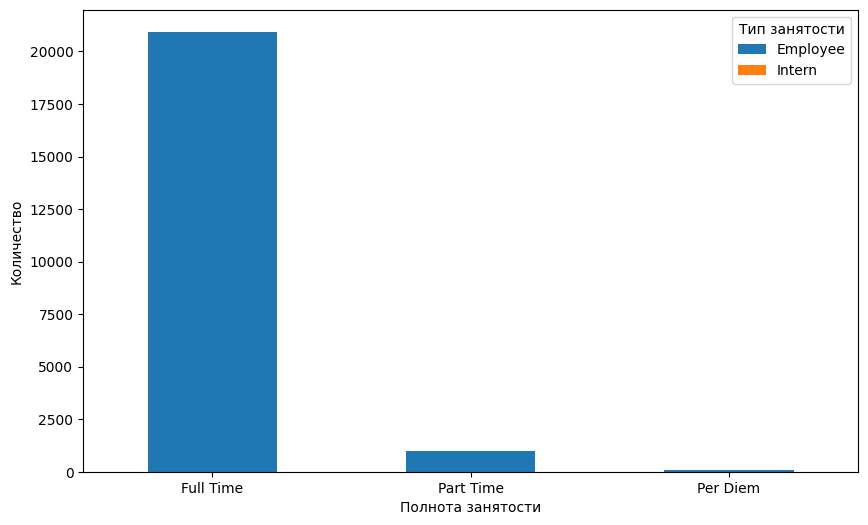

In [ ]:
employment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Полнота занятости")
plt.ylabel("Количество")
plt.legend(title="Тип занятости")
plt.xticks(rotation=0)
plt.show()



# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.